<a href="https://colab.research.google.com/github/JoseMendez34/Homework-Data-Augmentation/blob/main/M%C3%A9ndezReyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.

At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

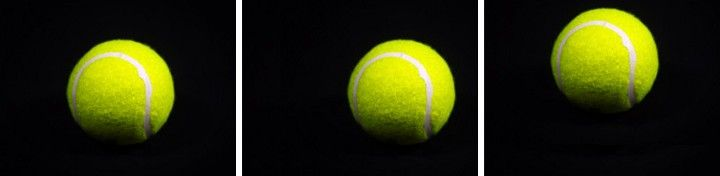



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise

##Keras principles
Keras was created to be user friendly, modular, easy to extend, and to work with Python. The API was “designed for human beings, not machines,” and “follows best practices for reducing cognitive load.”

Neural layers, cost functions, optimizers, initialization schemes, activation functions, and regularization schemes are all standalone modules that you can combine to create new models. New modules are simple to add, as new classes and functions. Models are defined in Python code, not separate model configuration files.

##Why Keras?
The biggest reasons to use Keras stem from its guiding principles, primarily the one about being user friendly. Beyond ease of learning and ease of model building, Keras offers the advantages of broad adoption, support for a wide range of production deployment options, integration with at least five back-end engines (TensorFlow, CNTK, Theano, MXNet, and PlaidML), and strong support for multiple GPUs and distributed training. Plus, Keras is backed by Google, Microsoft, Amazon, Apple, Nvidia, Uber, and others.

The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.

In [72]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #python image library
from urllib.request import urlopen #Read an email address

First we upload an image from the internet

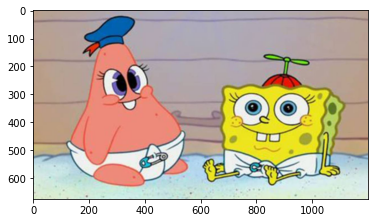

In [73]:
url = 'https://mexico.as.com/mexico/imagenes/2019/06/07/tikitakas/1559938371_534271_1559938551_noticia_normal.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.

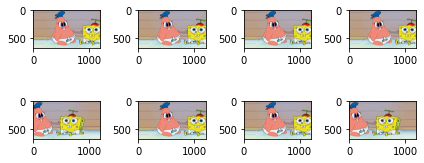

In [74]:
# We convert the image to an arrangement
data = img_to_array(img)
# we expand to a sample 
samples = expand_dims(data, 0)
# We create the data augmenter using only makeover 
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and display the results
for i in range(8):
	plt.subplot(340 + 1 + i)
	# batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') #it is converted to a valid value to be able to display it as an image 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to invert the rows or columns of pixels in the 

*   List item
*   List item

case of a vertical or horizontal turn, respectively.
The increase is specified by a Boolean argument **horizontal_flip** or **vertical_flip** for class **ImageDataGenerator**.

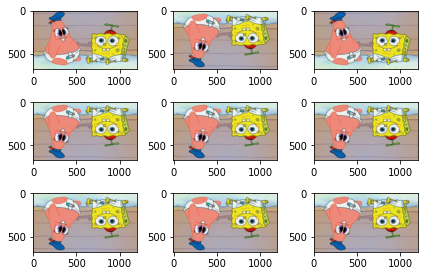

In [75]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower limit, upper limit] = [1-zoom_range, 1 + zoom_range]

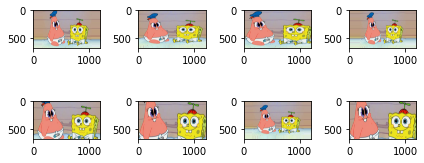

In [76]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(8):
	plt.subplot(340 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

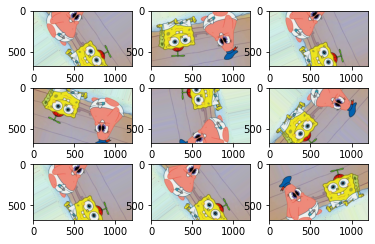

In [77]:
datagen = ImageDataGenerator(rotation_range=200)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.

featurewise_center: Boolean, set the mean of each element to zero of all data.
          samplewise_center**: Boolean, set the mean of each sample to zero
          featurewise_std_normalization: Boolean, Divide the entries by the standard deviation (std.) Of the data set, based on the characteristics.
          samplewise_std_normalization: Boolean, divide each data by its std.
          zca_epsilon: The default is 1e-6.
          zca_whitening: Boolean, indicates if ZCA bleaching is applied.

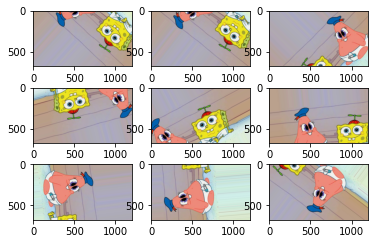

In [78]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [150,150],   
            height_shift_range           = [200,200],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following:

1.   Text Attack
2.   Google Trans

# TextAttack
Es un framework de Python para ataques de adversario, entrenamiento de adversarios y aumento de datos en NLP. Nos centraremos solo en el aumento de datos.

In [79]:
!pip install textattack

In [80]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

In [81]:
text = "Running is not always faster than walking"

TextAttack provides us with four methods for data augmentation.

## WordNetAugmenter
Augments the text by replacing with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.

In [82]:
aug = WordNetAugmenter();
aug.augment(text)

['Running is not always profligate than walking']

## EmbeddingAugmenter
 Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.

In [83]:
aug = EmbeddingAugmenter();
aug.augment(text)

['Running is not always faster than marche']

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [84]:
aug = CharSwapAugmenter()
aug.augment(text)

['Running is not always afster than walking']

## EasyDataAugmenter
Esto aumenta el texto con una combinación de reemplazo de sinónimos de Wordnet, eliminación de palabras, cambios de orden de palabras e inserciones de sinónimos. Todas estas 4 funcionalidades ocurren de forma aleatoria. Entonces obtendremos resultados diferentes cada vez que ejecutemos el código. Esto devuelve 4 resultados aumentados, a diferencia de los otros métodos.

In [85]:
aug = EasyDataAugmenter()
aug.augment(text)

['lead is not always faster than walking',
 'Running is not non always faster than walking',
 'faster is not always Running than walking',
 'Running is not always than walking']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the ** translate () ** method are:



1.   **src**: Source language. this parameter is optional since **googletrans** It will detect.
2.   **dest**: target language. Mandatory parameter.

1.   **text**: the text to be translated from the source language to the target language. Mandatory parameter.





When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

Some languages examples are:


*   Afrikáans	'af'

*   Chino (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'

In [86]:
!pip install googletrans

In [87]:
from googletrans import Translator
translator = Translator()

In [88]:
origin_text = "If you can do it alone, don't ask for help"
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If you can do it alone, don't ask for help
Uma ungakwenza wedwa, ungaceli usizo
If you can do it alone, don't ask for help


In [89]:
origin_text = "And if I see your mom, I ask her about you"
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

And if I see your mom, I ask her about you
そして、私があなたのお母さんに会ったら、私はあなたについて彼女に尋ねます
And when I meet your mom, I ask her about you


In [90]:
origin_text = "There is no one better to do things than yourself"
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

There is no one better to do things than yourself
Akekho omunye ongcono ukwenza izinto ngaphandle kwakho
There is no one better to do things than you
